<a href="https://colab.research.google.com/github/reidnersousa/IFB_Analise_Algoritmo_2024/blob/main/Analise_Algoritmo_busca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
####

import numpy as np
import random
import timeit
class Manager:
  def __init__(self, input_10_4 , input_10_5,input_10_6,input_10_7,quantidade_buscas):
    random.seed(42)
    self.QTD_REPETICAO_FOR  = quantidade_buscas

    self.input_4 = input_10_4
    self.input_5 = input_10_5
    self.input_6 = input_10_6
    self.input_7 = input_10_7

    self.num_q_bin = []
    self.num_q_seq = []
    self.num_q_seq_o = []

    self.resultado_busca_sequencial =[]
    self.media_busca_sequencial()


    self.resultado_busca_binaria =[]
    self.media_busca_binaria()

    self.resultado_sequencial_otimizado =[]
    self.media_busca_sequencial_otimizado()





  def media_busca_sequencial(self):
    resultado_sequencial =[]
    media_4=self.get_time(self.input_4,self.busca_sequencial)
    media_5=self.get_time(self.input_5,self.busca_sequencial)
    media_6=self.get_time(self.input_6,self.busca_sequencial)
    media_7=self.get_time(self.input_7,self.busca_sequencial)


    resultado_sequencial.append(media_4)
    resultado_sequencial.append(media_5)
    resultado_sequencial.append(media_6)
    resultado_sequencial.append(media_7)
    self.resultado_busca_sequencial = resultado_sequencial

  def media_busca_sequencial_otimizado(self):
    resultado_otimizado =[]
    media_4=self.get_time(self.input_4,self.busca_sequencial_otimizada)
    media_5=self.get_time(self.input_5,self.busca_sequencial_otimizada)
    media_6=self.get_time(self.input_6,self.busca_sequencial_otimizada)
    media_7=self.get_time(self.input_7,self.busca_sequencial_otimizada)


    resultado_otimizado.append(media_4)
    resultado_otimizado.append(media_5)
    resultado_otimizado.append(media_6)
    resultado_otimizado.append(media_7)
    self.resultado_sequencial_otimizado = resultado_otimizado

  def media_busca_binaria(self):
    resultado_binaria =[]
    media_4=self.get_time(self.input_4,self.busca_binaria)
    media_5=self.get_time(self.input_5,self.busca_binaria)
    media_6=self.get_time(self.input_6,self.busca_binaria)
    media_7=self.get_time(self.input_7,self.busca_binaria)


    resultado_binaria.append(media_4)
    resultado_binaria.append(media_5)
    resultado_binaria.append(media_6)
    resultado_binaria.append(media_7)
    self.resultado_busca_binaria = resultado_binaria



  def get_time(self,input,metodo_busca):
    lista_tempo =[]

    for i in range(self.QTD_REPETICAO_FOR):

      amostra=self.gerando_amostra(input)
      tempo_sequencial = timeit.timeit(lambda: metodo_busca(amostra),number=1)
      lista_tempo.append(tempo_sequencial)


    media_sequencial = np.mean(lista_tempo)
   # print("nome metodo", metodo_busca.__name__ ,"tempo",media_sequencial )
    print(f" nome metodo: {metodo_busca.__name__} tamanho amostra:{len(amostra):.0e} tempo {media_sequencial}")
    return media_sequencial

  def gerando_amostra(self,N):
    sequencia =[]
    for i in range(N):
      numero_aleatorio = random.randint(1,N)
      sequencia.append(numero_aleatorio)

    #sequencia=sorted(sequencia)
    ### Rodando sem ordenar
    sequencia = np.array(sequencia)
    sequencia.sort()
    return sequencia
## Tem que melhora esses algoritmos  de busca sequencial e busca sequencial otimizada
  def busca_sequencial(self,vetor,alvo=None):
    q = 0
    encontrou = False
    if alvo is None:
      alvo = random.randint(1,len(vetor))
    for i in range(len(vetor)):
      q = q+1
      if vetor[i] == alvo:
        encontrou = True
    self.num_q_seq.append(q)
    return encontrou

  def busca_sequencial_otimizada(self,vetor,alvo = None):
    encontrou = False
    q = 0
    if alvo is None:
      alvo = random.randint(1,len(vetor))
    for i in range(len(vetor)):
      q = q + 1
      if alvo < vetor[i]:
        encontrou = False
      elif alvo ==vetor[i]:

        encontrou = True

    self.num_q_seq_o.append(q)
    return encontrou

  def busca_binaria(self,vetor,alvo = None):

    q=0
    if alvo is None:
      alvo = random.randint(1,len(vetor))

    primeiro = 0
    ultimo  = len(vetor)-1
    encontrou = False

    while primeiro <= ultimo  and  not encontrou:

      m = (primeiro + ultimo )//2
      q= q+1
      if vetor[m]== alvo:

        encontrou = True

      else :
        ### menor
        if vetor[m]< alvo :
          primeiro = m+1
        ### maior
        elif vetor[m]> alvo :
          ultimo = m-1
    #print("encontrou",encontrou,q, vetor[m],alvo)
    self.num_q_bin.append(q)
    return encontrou

  def get_q(self):
    num_comparacoes_bin   =self.qtd_compacoes_por_amostra(self.num_q_bin)

    num_comparacoes_seq   =self.qtd_compacoes_por_amostra(self.num_q_seq)
    print(">>>",num_comparacoes_seq[0])
    num_comparacoes_seq_o =self.qtd_compacoes_por_amostra(self.num_q_seq_o)



    m4= np.mean(num_comparacoes_bin[0])
    self.q_bin_media_10_4 = round(m4,2)
    self.q_bin_media_10_5= round(np.mean(num_comparacoes_bin[1]),2)
    self.q_bin_media_10_6= round(np.mean(num_comparacoes_bin[2]),2)
    self.q_bin_media_10_7= round(np.mean(num_comparacoes_bin[3]),2)


    self.q_seq_media_10_4= round(np.mean(num_comparacoes_seq[0]),2)
    self.q_seq_media_10_5= round(np.mean(num_comparacoes_seq[1]),2)
    self.q_seq_media_10_6= round(np.mean(num_comparacoes_seq[2]),2)
    self.q_seq_media_10_7= round(np.mean(num_comparacoes_seq[3]),2)

    self.q_seq_o_media_10_4= round(np.mean(num_comparacoes_seq_o[0]),2)
    self.q_seq_o_media_10_5= round(np.mean(num_comparacoes_seq_o[1]),2)
    self.q_seq_o_media_10_6= round(np.mean(num_comparacoes_seq_o[2]),2)
    self.q_seq_o_media_10_7= round(np.mean(num_comparacoes_seq_o[3]),2)



  def qtd_compacoes_por_amostra(self,num_q):
    am_4 = []
    am_5 = []
    am_6 = []
    am_7 = []
    for i ,valor in enumerate(num_q):

      if  i < self.QTD_REPETICAO_FOR:
        am_4.append(valor)
      elif i < self.QTD_REPETICAO_FOR*2:
        am_5.append(valor)
      elif i < self.QTD_REPETICAO_FOR*3:
        am_6.append(valor)
      elif i < self.QTD_REPETICAO_FOR*4:
        am_7.append(valor)

    comparacoes = [am_4 ,am_5,am_6,am_7]


    return comparacoes


manager = Manager(10**4,10**5,10**6,10**7,10**2)
manager.get_q()
manager.q_bin_media_10_4

 nome metodo: busca_sequencial tamanho amostra:1e+04 tempo 0.005040176850000648
 nome metodo: busca_sequencial tamanho amostra:1e+05 tempo 0.05047448401999958
 nome metodo: busca_sequencial tamanho amostra:1e+06 tempo 0.23429461778000074
 nome metodo: busca_sequencial tamanho amostra:1e+07 tempo 2.3392805301699884
 nome metodo: busca_binaria tamanho amostra:1e+04 tempo 2.2737399992820427e-05
 nome metodo: busca_binaria tamanho amostra:1e+05 tempo 3.718393999861292e-05
 nome metodo: busca_binaria tamanho amostra:1e+06 tempo 4.2615740010205624e-05
 nome metodo: busca_binaria tamanho amostra:1e+07 tempo 5.01684800201474e-05
 nome metodo: busca_sequencial_otimizada tamanho amostra:1e+04 tempo 0.0031555928999750906
 nome metodo: busca_sequencial_otimizada tamanho amostra:1e+05 tempo 0.03301233372000752
 nome metodo: busca_sequencial_otimizada tamanho amostra:1e+06 tempo 0.35523332580000444


KeyboardInterrupt: 

In [ ]:
# Importe a biblioteca openpyxl
from openpyxl import Workbook

# Crie um novo arquivo de trabalho (workbook)
workbook = Workbook()

# Selecione a planilha ativa (a primeira planilha por padrão)
sheet = workbook.active

# Defina os títulos das colunas
sheet['A1'] = 'Nome do Método'
sheet['A2'] = 'Busca Binária'
sheet['A3'] = 'Busca Sequencial'
sheet['A4'] = 'Busca Sequencial Otimizada'

sheet['A5'] = 'Busca Binária'
sheet['A6'] = 'Busca Sequencial'
sheet['A7'] = 'Busca Sequencial Otimizada'





sheet['A8'] = 'Busca Binária'
sheet['A9'] = 'Busca Sequencial'
sheet['A10'] = 'Busca Sequencial Otimizada'


sheet['A11'] = 'Busca Binária'
sheet['A12'] = 'Busca Sequencial'
sheet['A13'] = 'Busca Sequencial Otimizada'
# Agora você pode preencher os dados nas células abaixo dos títulos
# Por exemplo:

sheet['B1'] = 'N'
sheet['B2'] = '10⁴'
sheet['B3'] = '10⁴'
sheet['B4'] = '10⁴'

sheet['B5'] = '10⁵'
sheet['B6'] = '10⁵'
sheet['B7'] = '10⁵'


sheet['B8'] = '10⁶'
sheet['B9'] = '10⁶'
sheet['B10'] = '10⁶'

sheet['B11'] = '10⁷'
sheet['B12'] = '10⁷'
sheet['B13'] = '10⁷'



sheet['C1'] = 'media dos Q'
sheet['C2']= manager.q_bin_media_10_4
sheet['C3']= manager.q_seq_media_10_4
sheet['C4']= manager.q_seq_o_media_10_4

sheet['C5']= manager.q_bin_media_10_5
sheet['C6']= manager.q_seq_media_10_5
sheet['C7']= manager.q_seq_o_media_10_5

sheet['C8']= manager.q_bin_media_10_6
sheet['C9']= manager.q_seq_media_10_6
sheet['C10']= manager.q_seq_o_media_10_6


sheet['C11']= manager.q_bin_media_10_7

sheet['C12']= manager.q_seq_media_10_7

sheet['C13']= manager.q_seq_o_media_10_7

sheet['D1'] = 'Tempo'
sheet['D2'] = manager.resultado_busca_binaria[0]
sheet['D3'] = manager.resultado_busca_sequencial[0]
sheet['D4'] = manager.resultado_sequencial_otimizado[0]

sheet['D5'] = manager.resultado_busca_binaria[1]
sheet['D6'] = manager.resultado_busca_sequencial[1]
sheet['D7'] = manager.resultado_sequencial_otimizado[1]


sheet['D8'] = manager.resultado_busca_binaria[2]
sheet['D9'] = manager.resultado_busca_sequencial[2]
sheet['D10'] = manager.resultado_sequencial_otimizado[2]



sheet['D11'] = manager.resultado_busca_binaria[3]
sheet['D12'] = manager.resultado_busca_sequencial[3]
sheet['D13'] = manager.resultado_sequencial_otimizado[3]

sheet['E1']= 'Quantidade de intereção no for '+str(manager.QTD_REPETICAO_FOR)

# Salve o arquivo
nome_arquivo = 'tabela_metodos_busca.xlsx'
workbook.save(nome_arquivo)

print(f"A tabela foi criada e salva no arquivo '{nome_arquivo}'.")
import pandas as pd

excel = pd.read_excel('tabela_metodos_busca.xlsx')
excel

A tabela foi criada e salva no arquivo 'tabela_metodos_busca.xlsx'.


,Nome do Método,N,media dos Q,Tempo,Quantidade de intereção no for 10
0,Busca Binária,10⁴,11.7,0.000034,NaN
1,Busca Sequencial,10⁴,10000.0,0.002686,NaN
2,Busca Sequencial Otimizada,10⁴,10000.0,0.002774,NaN
3,Busca Binária,10⁵,15.7,0.000050,NaN
4,Busca Sequencial,10⁵,100000.0,0.024506,NaN
5,Busca Sequencial Otimizada,10⁵,100000.0,0.029278,NaN
6,Busca Binária,10⁶,19.5,0.000056,NaN
7,Busca Sequencial,10⁶,1000000.0,0.251937,NaN
8,Busca Sequencial Otimizada,10⁶,1000000.0,0.356298,NaN
9,Busca Binária,10⁷,22.0,0.000083,NaN


In [ ]:
### Algoritmo de busca binaria , primeiro são definidos as variaveis  first(primeiro index ) = 0 , last (ultimo index ) = len(vetor) -1  e  found(encontrou elemento na lista) = False
### enquanto first for menor(<) ou igual(=) ao ultimo  e encontrou for False faz isso:
##### dentro do laço é criado  a variaveil midpoint(meio do vetor) ; midpoint   recebe os valores first mais  ultimo e dividir por dois apos a soma.
###### esse midpoint vai ser o indice do vetor , apos isso será feito uma busca para ve se o elemento alvo e vetor na posição que foi fornecida pelo midpoint são iguais.
###### caso sejam iguais encontrou o elemento no vetor, caso contraririo  e feito uma verificação :
####### primeiro é verificado se o alvo menor que vetor com posição do midpoint , caso seja  a variavel ultimo recebe uma nova atribuição que é midpoint menos um .CAso contrairo
####### e verificado se o alvo maior que vetor com posição do midpoint , caso seja a variavel primeiro recebe uma nova atribuição que é midpoint mais um.
####### Apos uma dessas verificações voltamos para inicio do while onde e feito novamente a atribuição do midpoint , pois agora os valores do primeiro ou ultimo podem de sido alterado assim
####### o valor de midpoint é alterando sendo assim com valor do midpoint alterado significa que o index do vetor é diferente ou seja vai ser feito outra verificação , esse processo do if vai ser executado ate acha o alvo


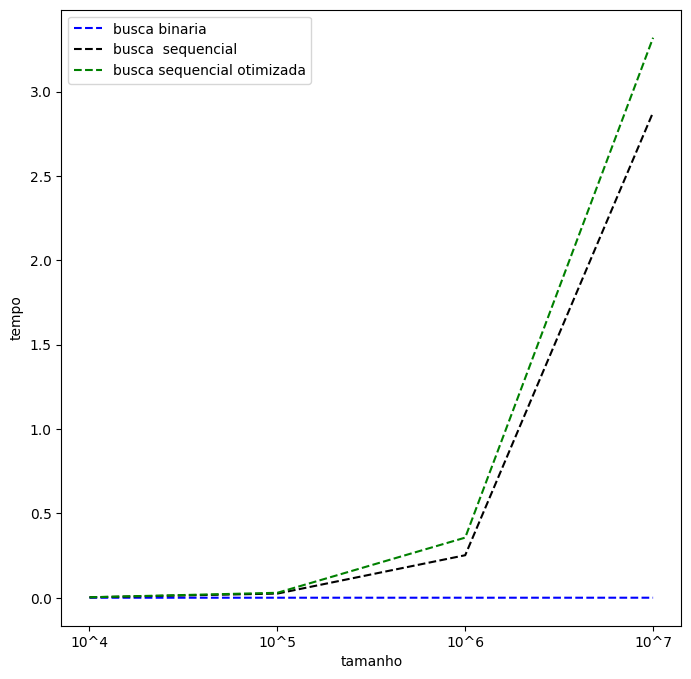

In [ ]:
import matplotlib.pyplot as plt

def gerando_grafico(entrada,tempo,algoritmo):

  plt.figure(figsize=(8,8))
  plt.plot(entrada ,tempo[0] , label=algoritmo[0],color='blue',linestyle='--')
  plt.plot(entrada ,tempo[1] , label=algoritmo[1],color='black',linestyle='--')
  plt.plot(entrada ,tempo[2] , label=algoritmo[2],color='green',linestyle='--')
  plt.xlabel("tamanho")
  plt.ylabel("tempo")

  plt.legend()

input=['10^4','10^5','10^6','10^7']
tempo = []
tempo.append(manager.resultado_busca_binaria)
tempo.append(manager.resultado_busca_sequencial)
tempo.append(manager.resultado_sequencial_otimizado)

algoritmo=['busca binaria','busca  sequencial','busca sequencial otimizada']
gerando_grafico(input,tempo,algoritmo)

[ 1  2  3  4  5  6  7  8  9 10]
10 10 10


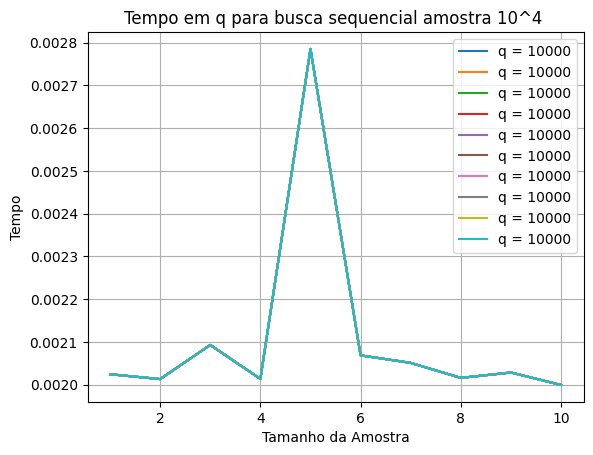

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de q
q_values= [10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]
tempo=[0.002024149000135367, 0.0020128189999013557, 0.002092673999868566,
 0.002013175999309169, 0.002785223999126174, 0.0020683110005847993,
 0.0020507440003711963, 0.0020156480004516197, 0.002028189000156999,
 0.0019991630006188643]

# Tamanhos da sequência (eixo x)
sequence_sizes = np.arange(1, 11)
 # Suponho que você deseja sequências de tamanho 1 a 100
print(sequence_sizes)

print(len(sequence_sizes),len(tempo),len(q_values))
# Crie um gráfico para cada valor de q
for q in q_values:
    #times = [calculate_time(q, size) for size in sequence_sizes]
    plt.plot(sequence_sizes, tempo, label=f"q = {q}")

plt.xlabel("Tamanho da Amostra")
plt.ylabel("Tempo")
plt.title("Tempo em q para busca sequencial amostra 10^4 ")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import random




def gerando_amostra(N):
  sequencia =[]
  for i in range(N):
    numero_aleatorio = random.randint(1,N)
    sequencia.append(numero_aleatorio)

  #sequencia=sorted(sequencia)
  sequencia = np.array(sequencia)
  sequencia.sort()
  return sequencia

amostra_10_4 = gerando_amostra(10**4)

In [ ]:
import numpy as np


print(amostra_10_4)
def buscar_binaria(vetor,alvo = None):
  q = 0
  if alvo is None:
    alvo = random.randint(1,len(vetor))

  tamanho_vetor = len(vetor)
  inicial = 0
  ultimo  = tamanho_vetor-1
  encontrou = False
  x = alvo

  while inicial <= ultimo :
    q =q +1
    m = (inicial + ultimo )//2

    if vetor[m]== x:

      return True
    elif vetor[m]< x :
        inicial = m+1
    elif vetor[m]> x :
      ultimo = m-1
  else :
    return False

achou=buscar_binaria(amostra_10_4)
print(achou)

[    1     3     3 ...  9997  9998 10000]
True


In [ ]:
def busca_sequencial(vetor,alvo=None):
    q = 0
    encontrou = False
    if alvo is None:
      alvo = random.randint(1,len(vetor))
      print(alvo)
    for i in range(len(vetor)):
      q = q+1
      if vetor[i] == alvo:
        encontrou = True
    return encontrou

print(amostra_10_4)
a = busca_sequencial(amostra_10_4,3)
print(a)

[    3     4     5 ...  9999 10000 10000]
True


In [ ]:

def busca_sequencial_otimizada(vetor,alvo = None):
  encontrou = False
  q = 0
  if alvo is None:
    alvo = random.randint(1,len(vetor))
  for i in range(len(vetor)):
    if alvo < vetor[i]:
      encontrou = False
    elif alvo ==vetor[i]:
      q = q + 1
      encontrou = True
  return encontrou
print(amostra_10_4)
b = busca_sequencial_otimizada(amostra_10_4,3)
b

[    3     4     5 ...  9999 10000 10000]


False